### $H(z)$ from luminosity distance $D_L$
The ultimate goal is to be able to calculate the growth function, given by
$$ g(z) \equiv \frac{5\Omega_m}{2} \int_0^a \dfrac{da}{a^3H(a)^3}.$$
To do so we will obtain $H(z)$ from SNIa distance modulus measurements $\mu$. $\mu$ and $D_L$ are related by
$$\mu = 5\log D_L - 5,$$
and $D_L$ relates to the transverse comoving distance $D_M$ by
$$D_L = (1 + z)D_M $$
In a flat universe the transverse comoving distance $D_M$ is the same as the comoving distance $D_C$. From the Friedmann equantion we know that
$$\dfrac{d D_C}{d z}=\dfrac{c}{H(z)}.$$
Therefore by differentiating $D_L$ we can solve for $H(z)$:
$$\dfrac{d D_L}{dz} = \dfrac{D_L}{1+z} + \dfrac{(1+z)\,c}{H(z)}.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import scipy.interpolate as itp

%matplotlib inline

In [2]:
# reading data and assigning to a pandas dataframe
# name, redshift, distance modulus, distance modulus error
column_names = ['name', 'z', 'dm', 'dm_err']
udf = pd.read_csv('SCPUnion2.1_mu_vs_z.txt',sep ='\t', skiprows=5,header=None,usecols=[0,1,2,3],
                      names = column_names, index_col = 0)
# sorting by z
udf.sort_values('z', inplace=True)
# first 5 elements
udf[:5]

,z,dm,dm_err
name,,,
1999aa,0.015000,34.163504,0.161453
2007s,0.015000,34.111411,0.213389
2006td,0.015000,34.379773,0.217349
2005bo,0.015027,33.950192,0.178117
2007ca,0.015100,34.525875,0.213682


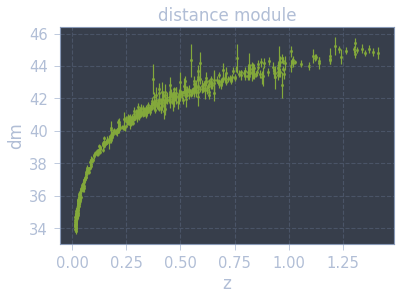

In [3]:
# distance modulus as a function of redshift with error bars
udf.plot.scatter(x='z',y='dm',yerr='dm_err', c='C1',s=8);
plt.title('distance module');
plt.show()

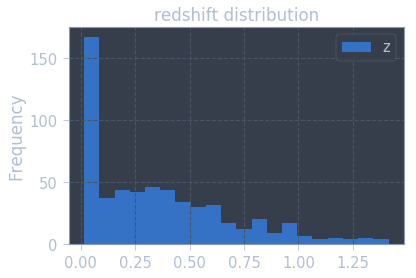

In [4]:
# redshift distribution
udf.plot.hist(y='z',bins=20);
plt.title('redshift distribution');

luminosity distance:
$$D_L = 10^{\, \mu/5 + 1}$$
$$\delta D_L = 2\cdot 10^{\mu/5}\log 10 \delta\mu $$


In [5]:
dl = 10**(udf.dm/5+1)
dl_err = 2 * 10**(udf.dm/5) * np.log(10) * udf.dm_err
udf['dl'],udf['dl_err'] = dl,dl_err

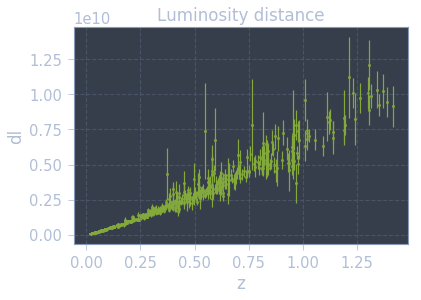

In [6]:
# luminosity distance by redshift with error bars
udf.plot.scatter(x='z',y='dl',yerr='dl_err',c='C1',s=8);
plt.title('Luminosity distance');

### Curve fits

In [7]:
# curve fit function: returns parameters, covariance matrix of parameters and chi2
def cfit(f):
    x, y, y_err = udf[['z','dl','dl_err']].values.T
    popt, pcov = opt.curve_fit(f, x, y, sigma=y_err)
    chi2 = np.sum((f(x,*popt) - y)**2/y_err**2)
    return popt, pcov, chi2

# curve fit plot: plot curve and labels with reduced chi2
def cf_plot(f , label=None):
    popt, pcov, chi2 = cfit(f)
    plt.plot(udf.z,f(udf.z, *popt), lw=2, 
             label=label+": chi2={}".format(np.round(chi2/len(udf),decimals=2)))

# fitting functions to test
def p2(x,c0,c1,c2):
    return c0 + c1*x + c2*x**2

def p3(x,c0,c1,c2,c3):
    return c0 + c1*x + c2*x**2 + c3*x**3

def e1(x, c0, c1, c2):
    return c0 + c1*np.exp(c2*x)

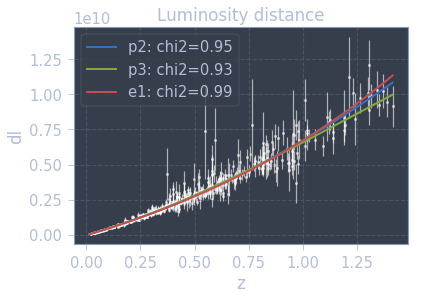

In [8]:
# plotting luminosity distance with three fitting functions
# labels show reduced chi square
udf.plot.scatter(x='z',y='dl',yerr='dl_err',c='white',alpha=0.6,s=8);
plt.title('Luminosity distance');

cf_plot(p2, 'p2')
cf_plot(p3, 'p3')
cf_plot(e1, 'e1')

plt.legend()
plt.show()

### Interpolation
Not sure how error propagation should be done in this case

In [9]:
# x and y values to interpolate over
x = udf.z.values
y = udf.dl.values/udf.dl.max() #normalizing to facilitate smoothing

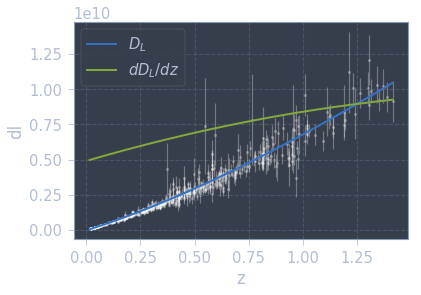

In [28]:
# fitting cubic spline, 's' is the smoothing parameter
spl = itp.UnivariateSpline(x,y,k=3,s=10)
# rescaling back
def dl_spl(x,i=0):
    return spl(x,i)*udf.dl.max()

#plotting
udf.plot.scatter(x='z',y='dl',yerr='dl_err',c='white',alpha=0.3,s=8);
plt.plot(x,dl_spl(x),lw=2, label=r"$D_L$")
plt.plot(x,dl_spl(x,1),lw=2, label=r"$d D_L/dz$")

plt.legend()
plt.show()